In [1]:
import sys
sys.path.append('/Users/danielskauge/start_code_2024')
from src.simulation import run_full_simulation, SolarSetup, BatterySetup


results = run_full_simulation(
    lat=63.4, 
    lon=10.4,
    building_params={'width': 10, 'length': 10, 'wall_height': 2.4, 'glazing_ratio': 0.2, 'num_windows': 4, 'num_doors': 1, 'roof_type': 'gable'},
    heating_params={'temperature_setpoint': 21, 'COP': 3.5, 'min_Q_heating': 0, 'max_Q_heating': 5, 'initial_temperature_inside': 18},
    occupant_profile=[2,2,2,2,1,1,0,0,0,1,1,1,1,1,1,1,2,2,2,2,1,1,1,1],  # 24 hours
    solar_setup=SolarSetup(peak_power_kw=10.0),  # optional
    battery_setup=BatterySetup(capacity_kwh=20.0)  # optional
)

In [2]:
print("Simulation Results Lengths and Ranges:")
for key, value in results.items():
    if isinstance(value, list):
        print(f"{key}: Length = {len(value)}, Min = {min(value)}, Max = {max(value)}")
    else:
        print(f"{key}: Length = N/A (not a list)")



Simulation Results Lengths and Ranges:
temperatures_inside: Length = 24, Min = 18.376966441305587, Max = 20.939150468674473
temperatures_outside: Length = 24, Min = 1.8, Max = 4.8
energy_consumption_heating: Length = 24, Min = 0.31656191505141834, Max = 1.4285714285714286
energy_consumption_appliances: Length = N/A (not a list)
total_energy_consumption: Length = 24, Min = 0.31656191505141834, Max = 2.465993798044913
Q_heating: Length = 24, Min = 1.1079667026799642, Max = 5
Q_loss: Length = 24, Min = 1.236675360497411, Max = 1.7897157122238707
solar_generation: Length = 24, Min = 0, Max = 0.9188738359960475
spot_prices: Length = 24, Min = -0.00059, Max = 0.0103375
battery_soc: Length = 24, Min = 42.85714285714286, Max = 92.85714285714286
grid_power: Length = 24, Min = -0.39796665478211957, Max = 6.428571428571429


Data lengths:
Solar: 24
Battery: 24
Grid: 24
Prices: 24
Temp In: 24
Temp Out: 24
Consumption: 24


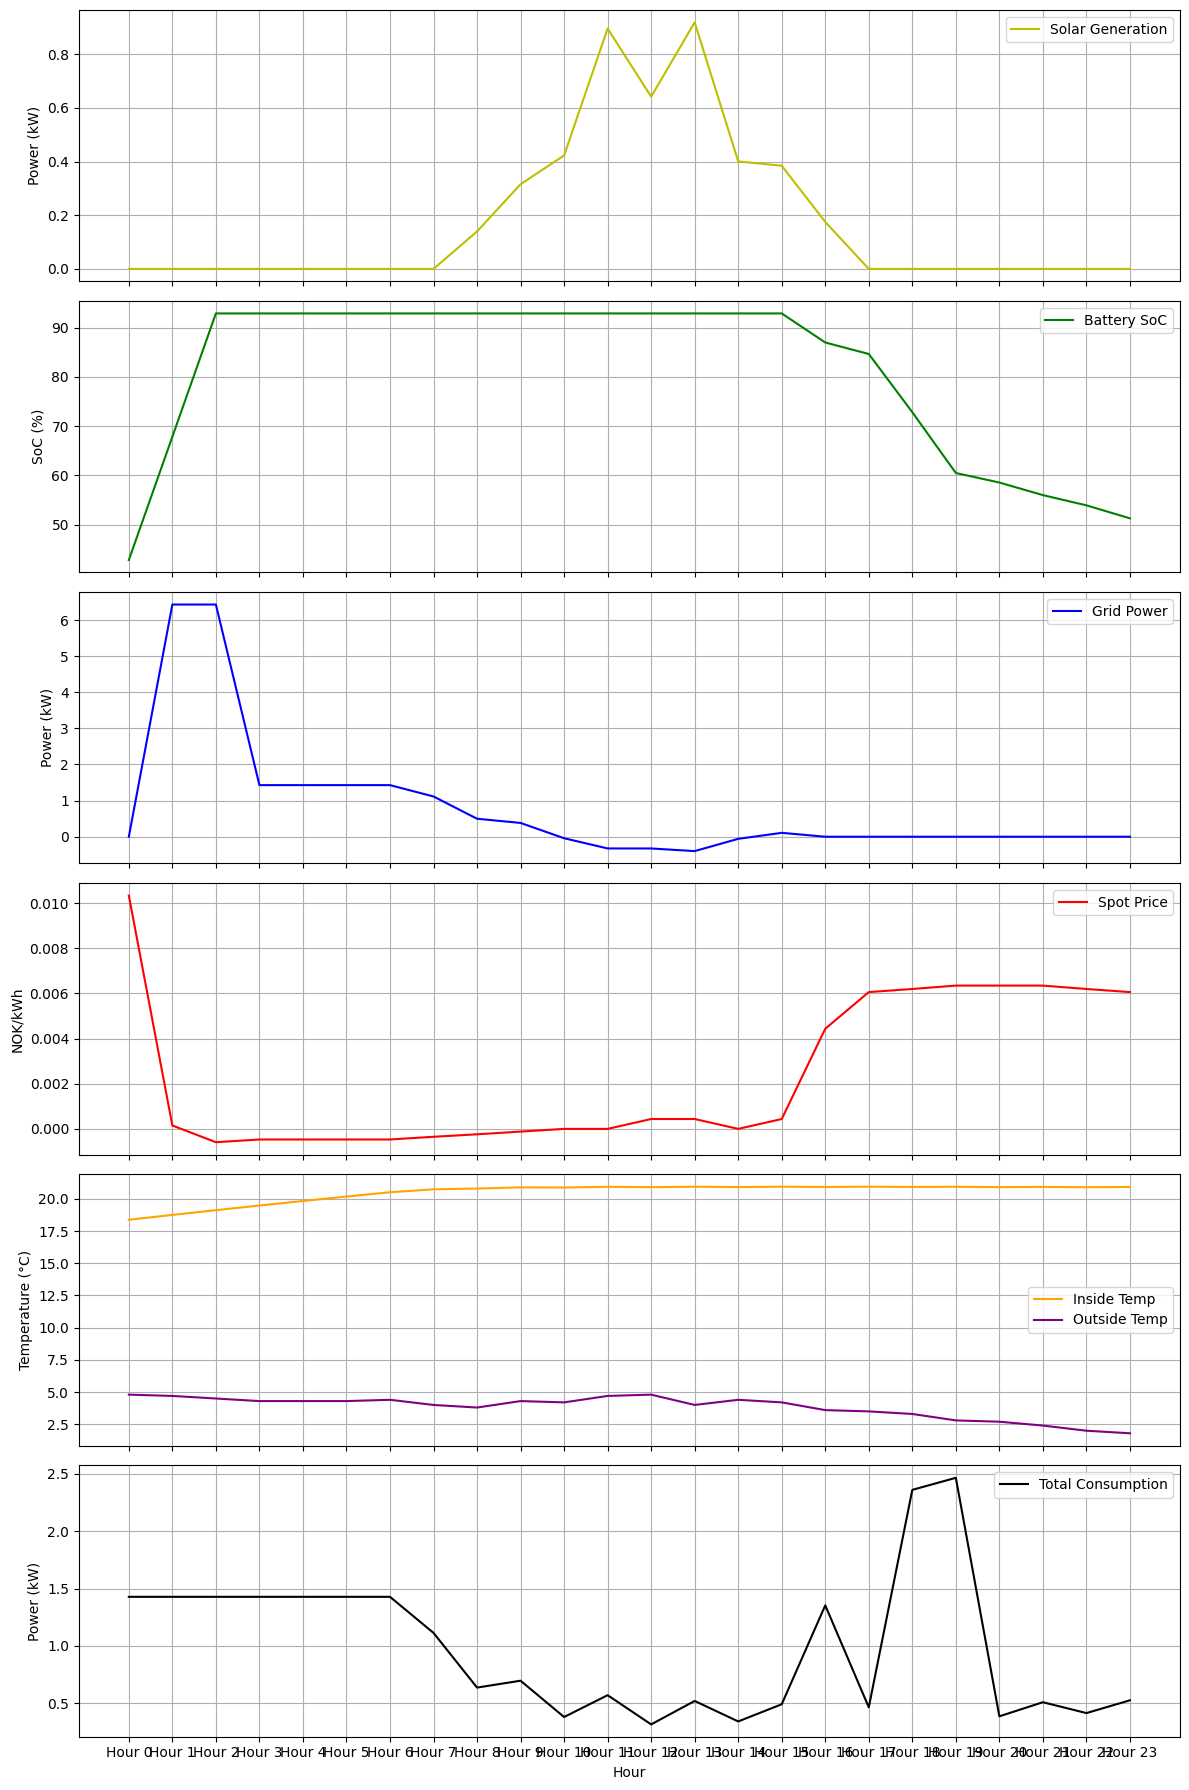

In [4]:
import matplotlib.pyplot as plt

# Extract data for plotting with correct keys and default empty lists
timestamps = [f"Hour {i}" for i in range(24)]
solar_generation = results.get('solar_generation', [0]*24)
battery_soc = results.get('battery_soc', [0]*24)
grid_power = results.get('grid_power', [0]*24)
spot_prices = results.get('spot_prices', [0]*24)
temperatures_inside = results.get('temperatures_inside', [0]*24)  # Changed key
temperatures_outside = results.get('temperatures_outside', [0]*24)  # Changed key
total_energy_consumption = results.get('total_energy_consumption', [0]*24)

# Verify all lists have data
print("Data lengths:")
print(f"Solar: {len(solar_generation)}")
print(f"Battery: {len(battery_soc)}")
print(f"Grid: {len(grid_power)}")
print(f"Prices: {len(spot_prices)}")
print(f"Temp In: {len(temperatures_inside)}")
print(f"Temp Out: {len(temperatures_outside)}")
print(f"Consumption: {len(total_energy_consumption)}")

# Create subplots
fig, axs = plt.subplots(6, 1, figsize=(12, 18), sharex=True)

# Solar Generation
axs[0].plot(timestamps, solar_generation, 'y', label='Solar Generation')
axs[0].set_ylabel('Power (kW)')
axs[0].legend()
axs[0].grid(True)

# Battery State of Charge 
axs[1].plot(timestamps, battery_soc, 'g', label='Battery SoC')
axs[1].set_ylabel('SoC (%)')
axs[1].legend()
axs[1].grid(True)

# Grid Power
axs[2].plot(timestamps, grid_power, 'b', label='Grid Power')
axs[2].set_ylabel('Power (kW)') 
axs[2].legend()
axs[2].grid(True)

# Spot Prices
axs[3].plot(timestamps, spot_prices, 'r', label='Spot Price')
axs[3].set_ylabel('NOK/kWh')
axs[3].legend()
axs[3].grid(True)

# Inside Temperature
axs[4].plot(timestamps, temperatures_inside, 'orange', label='Inside Temp')  # Changed variable name
axs[4].plot(timestamps, temperatures_outside, 'purple', label='Outside Temp')  # Changed variable name
axs[4].set_ylabel('Temperature (°C)')
axs[4].legend()
axs[4].grid(True)

# Total Energy Consumption
axs[5].plot(timestamps, total_energy_consumption, 'k', label='Total Consumption')
axs[5].set_ylabel('Power (kW)')
axs[5].set_xlabel('Hour')
axs[5].legend()
axs[5].grid(True)

plt.tight_layout()
plt.show()